In [4]:
# Import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import multihash as mh
from cid import make_cid

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["figure.facecolor"] = "white"

db_con = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k20_hops",
    user="hoarder",
    password="password")

In [5]:
cids = pd.read_sql_query("""
SELECT cid_hash from cid_info;
""", db_con)

# get multihash from the CID b58 string()
cids['multihash'] = cids.apply(lambda row: make_cid(row['cid_hash']).multihash ,axis=1)

# get the int of the multihash.hash()
cids['hash_int'] = cids.apply(lambda row: int.from_bytes( mh.decode(row['multihash']).digest, byteorder="big") ,axis=1)

sha256 = (2 ** 256) -1
# normalize multihash.hash() in int in sha256 space
cids['hash_int_norm'] = cids.apply(lambda row: row['hash_int'] / sha256 ,axis=1)

ordered_cids = cids.sort_values('hash_int_norm')


Text(0.5, 1.0, 'CID CDF in the SHA256 hash-space')

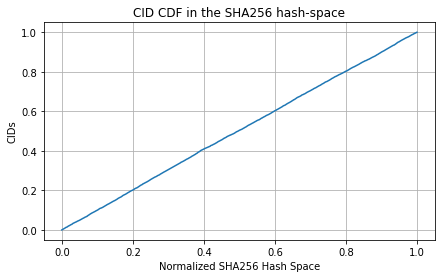

In [6]:
plt.plot(ordered_cids['hash_int_norm'], np.linspace(0, 1, len(ordered_cids['hash_int_norm'])))
plt.grid()
plt.xlabel('Normalized SHA256 Hash Space')
plt.ylabel('CIDs')
plt.title('CID CDF in the SHA256 hash-space')


39.0625
max 58.0 (array([99]),)
min 22.0 (array([210]),)


Text(0.5, 1.0, 'CID PDF in the SHA256 Hash Space')

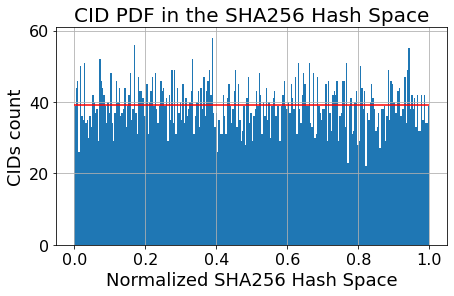

In [12]:
BINS = 256 # KBUCKETs

bins = plt.hist(ordered_cids['hash_int_norm'], bins=BINS)
plt.grid()
plt.xlabel('Normalized SHA256 Hash Space', fontsize=18)
plt.ylabel('CIDs count', fontsize=18)
mean = np.mean(bins[0])
maxi = max(bins[0])
mini = min(bins[0])
print(mean)
print(f"max {maxi} {np.where(bins[0] == maxi)}")
print(f"min {mini} {np.where(bins[0] == mini)}")
plt.hlines(y=[mean], xmin=0, xmax=1, color='r', linestyle='-', label='50%')
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.title('CID PDF in the SHA256 Hash Space', fontsize=20)



In [ ]:
db_con.close()